<a href="https://colab.research.google.com/github/maunzeb/MLTest/blob/main/LatencyToMeal0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from ast import increment_lineno
# importing the libraries
import numpy as np # number python
import matplotlib.pyplot as plt
import pandas as pd # importing data and creating data frames
import seaborn as sns #works with matplotlib
%matplotlib inline #



In [57]:
# load the data set and look at variable (Extracting dependent and independent
# loadind and inspecting data
from google.colab import files
uploaded = files.upload()

import io
feeding = pd.read_csv(io.BytesIO(uploaded['Meal_Patterns_Mawere_1_2.csv']))
# Dataset is now stored in a Pandas Dataframe

print(feeding.shape)
feeding.describe()

Saving Meal_Patterns_Mawere_1_2.csv to Meal_Patterns_Mawere_1_2 (6).csv
(120, 13)


,Amt1,Amt2,Duration1,Duration2,TotalAmt,LatencyMeal1,LatencyMeal2,TotalTimeEating,PercentTimeEating,EatingRateMgMin,DailyFoodIntake,BrainRegion,DrugTreatment
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,2.284667,2.358917,31.456667,22.930833,8.327833,52.183333,72.632917,88.447500,24.778583,22.909750,19.999750,0.508333,1.450000
std,1.665822,1.503824,29.917199,17.938155,3.202650,50.132594,56.566615,48.740018,13.342637,9.078662,5.893282,0.502027,1.114081
min,0.210000,0.210000,0.220000,2.600000,0.390000,1.000000,15.400000,13.600000,3.790000,1.100000,3.090000,0.000000,0.000000
25%,0.887500,1.090000,13.500000,10.850000,6.555000,16.000000,31.750000,53.300000,14.970000,17.950000,16.692500,0.000000,0.000000
50%,2.220000,2.275000,23.950000,18.400000,8.475000,34.000000,58.050000,80.450000,22.345000,23.250000,21.030000,1.000000,1.000000
75%,3.162500,3.335000,38.850000,28.600000,10.517500,71.250000,98.075000,113.275000,31.455000,29.225000,23.247500,1.000000,2.000000
max,9.050000,7.730000,202.900000,90.450000,16.500000,309.000000,304.700000,285.600000,79.330000,45.800000,38.510000,1.000000,3.000000


In [69]:
X=feeding.iloc[:,:].values
y=feeding.iloc[:,5].values

feeding.tail()

,Amt1,Amt2,Duration1,Duration2,TotalAmt,LatencyMeal1,LatencyMeal2,TotalTimeEating,PercentTimeEating,EatingRateMgMin,DailyFoodIntake,BrainRegion,DrugTreatment
115,4.20,1.80,52.4,18.30,8.54,23.0,90.2,92.1,25.57,23.7,18.38,1,3.0
116,4.29,1.09,75.4,3.85,11.51,10.0,38.2,140.0,38.90,32.0,26.82,1,3.0
117,1.90,2.56,17.4,88.50,7.09,52.0,109.6,16.3,19.70,19.7,18.72,1,3.0
118,1.61,1.35,48.2,19.30,8.93,16.0,17.1,152.9,42.46,24.8,19.42,1,3.0
119,4.81,0.30,90.5,11.60,11.09,11.0,65.8,159.9,44.43,30.8,22.91,1,3.0


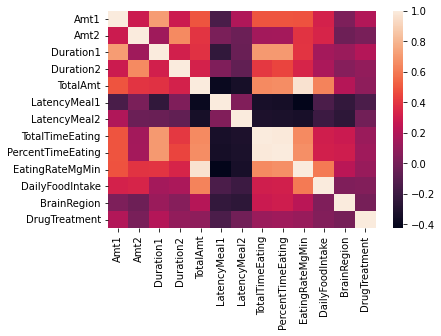

In [59]:
# Data Visualization
# Building a correlation matrix
sns.heatmap(feeding.corr())

In [60]:
# Avoiding dummy variable trap
X=X[:,:]
print(X)

[[ 1.37  2.01 23.4  ... 20.2   0.    0.  ]
 [ 0.96  3.55 23.8  ...  7.29  0.    0.  ]
 [ 1.53  2.78 37.3  ... 22.46  0.    0.  ]
 ...
 [ 1.9   2.56 17.4  ... 18.72  1.    3.  ]
 [ 1.61  1.35 48.2  ... 19.42  1.    3.  ]
 [ 4.81  0.3  90.5  ... 22.91  1.    3.  ]]


In [61]:
#creating Linear regression model
# Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [64]:
# Fitting the multiple linear regression model to the training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)



LinearRegression()

In [65]:
# Predicting the Test set results
y_pred=regressor.predict(X_test)
y_pred

array([ 17.,  20.,  20., 129.,  69.,  28., 139.,   8., 309.,  21.,  52.,
        85.,   5.,  21.,  11., 103.,  68., 125.,   5., 107., 158.,  68.,
        24.,   4.])

In [66]:
# Calculating the coefficients
print(regressor.coef_)


[ 2.09568816e-15  1.80411242e-16  1.45716772e-16  2.25514052e-16
 -1.81833715e-14  1.00000000e+00  2.84494650e-16 -6.80011603e-16
 -2.28983499e-16  6.81399381e-15  3.75567633e-16 -5.42805818e-16
  4.81168924e-16]


In [67]:
# Calculating the intercept
print(regressor.intercept_)

2.1316282072803006e-14


In [68]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


1.0

I think we have trained our model and it seems good for what we need it to do. predict latency to first meal given multiple independent variables (predictors of feeding)